In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
uploaded = files.upload()

Saving BandGap1_10000.csv to BandGap1_10000.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['BandGap1_10000.csv']))

In [ ]:
df

,c2,s,BandGap1
0,0.15,0.01,3.255800e-02
1,0.30,0.01,2.749700e-02
2,0.45,0.01,2.075500e-02
3,0.60,0.01,1.433700e-02
4,0.75,0.01,8.508700e-03
...,...,...,...
9995,14.40,1.00,1.780000e-14
9996,14.55,1.00,1.820000e-14
9997,14.70,1.00,3.110000e-14
9998,14.85,1.00,2.180000e-14


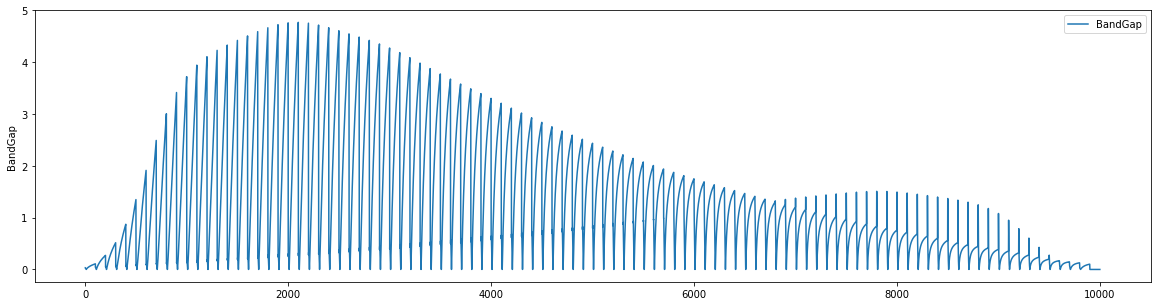

In [ ]:
df.plot(y='BandGap', figsize=(20, 5))
plt.ylabel('BandGap')
plt.show()

In [ ]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

# pythonでは1行目を0行目と数える. x_trainではcsvファイルの1行目から２行目を，y_trainでは3行目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2]]

In [ ]:
# データの正規化
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [ ]:
# モデルの構築
# inputの数:c2, s
n_in = 2

# ノードの数
n_hidden = 16

# outputの数:BandGap
n_out = 1

# 学習回数
epochs = 100
batch_size = 64

model = Sequential()
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(n_hidden, activation= 'relu', input_dim=n_in))
model.add(Dense(units=n_out))
model.summary()

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=optimizer)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-traina

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                48        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 16)                272       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-traina

In [ ]:
 # 学習オプション
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/100
125/125 [==============================] - 3s 4ms/step - loss: 2.2588 - val_loss: 0.7815
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5379 - val_loss: 0.3307
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.2249 - val_loss: 0.1321
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0973 - val_loss: 0.0648
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.0383
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0321 - val_loss: 0.0278
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0227 - val_loss: 0.0198
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0169 - val_loss: 0.0178
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0145 - val_loss: 0.0143
Epoch 10/100
125/125 [==============================] - 0s 3ms/step - loss: 0.0130 - val_lo

In [ ]:
test_predict = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


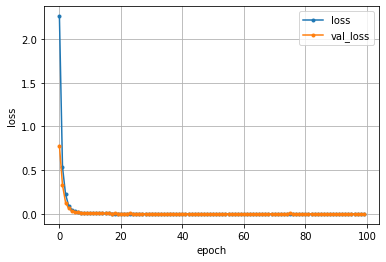

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# MAE
test_MAE = mean_absolute_error(y_test, test_predict)
print('MAE：', test_MAE)

# MSE
test_MSE = mean_squared_error(y_test, test_predict)
print('MSE：', test_MSE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test, test_predict))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test, test_predict)
print('R2：', R2)

# MAEに対するRMSEの比
print('RMSE/MAE：', test_RMSE / test_MAE)

MAE： 0.031541672782473704
MSE： 0.0021202286628516174
RMSE： 0.04604594078582408
R2： 0.9990866746035825
RMSE/MAE： 1.4598446031502093


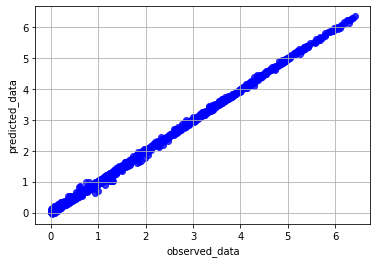

In [ ]:
plt.figure()
plt.scatter(y_test, test_predict, c='blue', alpha=0.8)
plt.ylim(plt.ylim())
plt.grid()
plt.xlabel('observed_data')
plt.ylabel('predicted_data')
plt.show()

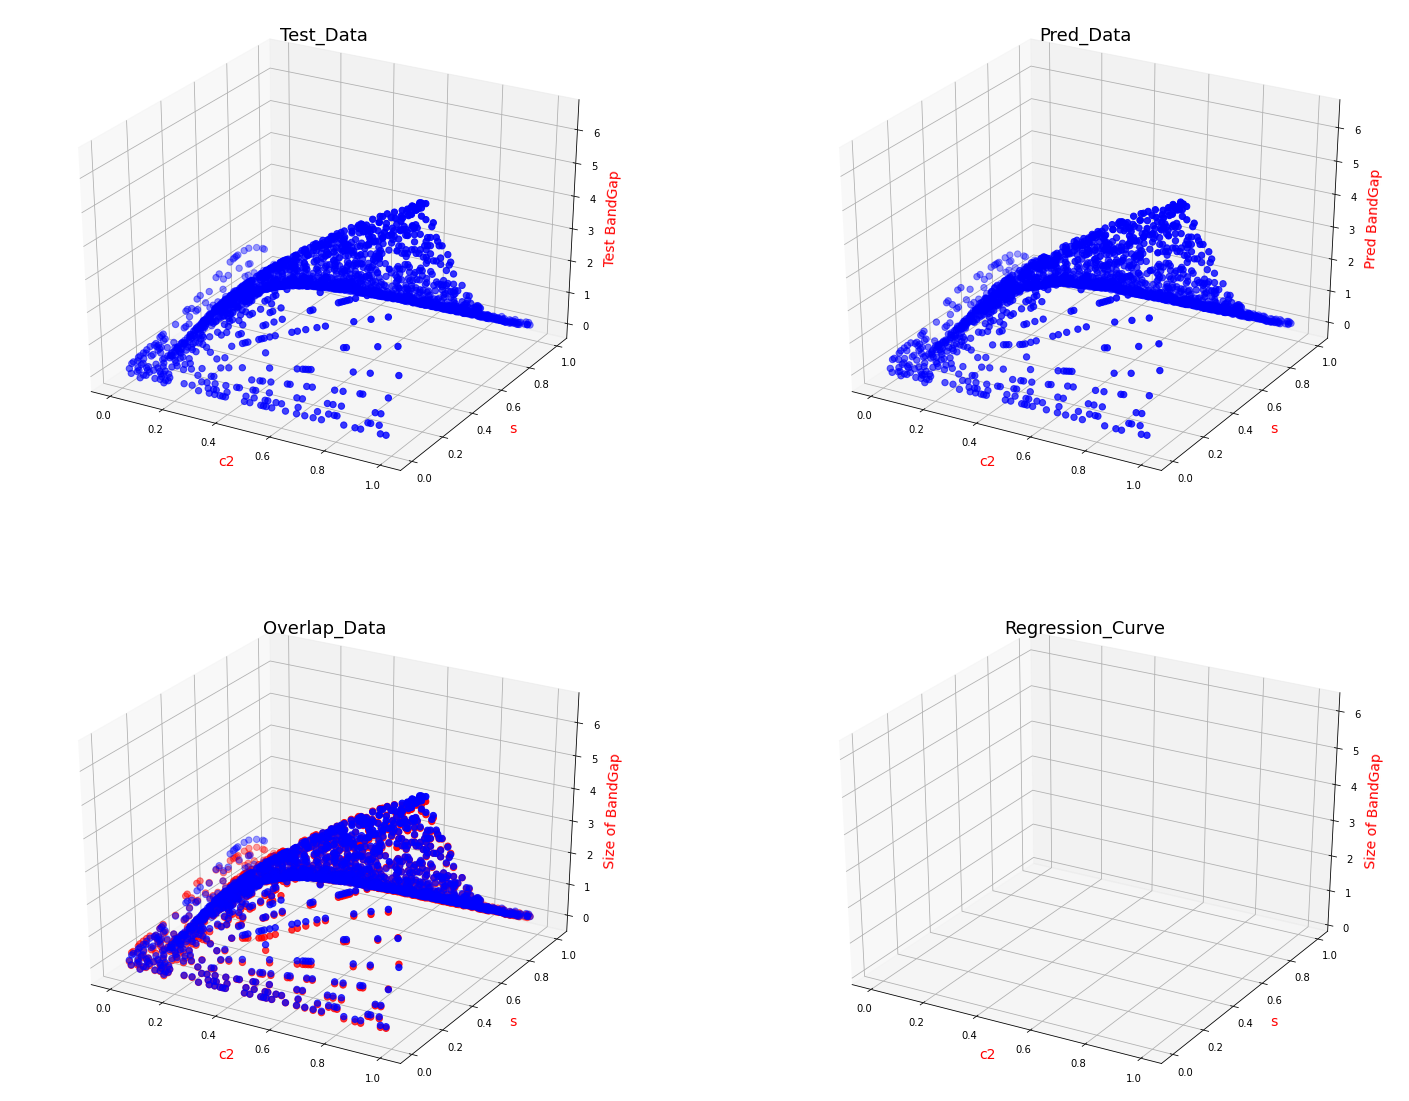

In [ ]:
# Figureを追加
fig = plt.figure(figsize = (25, 20))

# 3DAxesを追加
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Axesのタイトルを設定
ax1.set_title("Test_Data", size = 18)
ax2.set_title("Pred_Data", size = 18)
ax3.set_title("Overlap_Data", size = 18)
ax4.set_title("Regression_Curve", size = 18)

# 軸ラベルを設定
ax1.set_xlabel("c2", size = 14, color = "r")
ax1.set_ylabel("s", size = 14, color = "r")
ax1.set_zlabel("Test BandGap", size = 14, color = "r")
ax2.set_xlabel("c2", size = 14, color = "r")
ax2.set_ylabel("s", size = 14, color = "r")
ax2.set_zlabel("Pred BandGap", size = 14, color = "r")
ax3.set_xlabel("c2", size = 14, color = "r")
ax3.set_ylabel("s", size = 14, color = "r")
ax3.set_zlabel("Size of BandGap", size = 14, color = "r")
ax4.set_xlabel("c2", size = 14, color = "r")
ax4.set_ylabel("s", size = 14, color = "r")
ax4.set_zlabel("Size of BandGap", size = 14, color = "r")

# x,y,zに要素追加
x = x_test.iloc[:, [0]]
y = x_test.iloc[:, [1]]
z1 = y_test
z2 = test_predict

# 散布図
ax1.scatter(x, y, z1, s = 40, c = "blue")
ax2.scatter(x, y, z2, s = 40, c = "blue")
ax3.scatter(x, y, z1, s = 40, c = "blue")
ax3.scatter(x, y, z2, s = 40, c = "red")
ax4.plot_surface(x, y, z2)

plt.show()